# Introduction


A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

In [ ]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# There is Two dataset one has all features and another has Target variable so we first Merge the Data

#loading the data set
df=pd.read_csv("/content/Credit_card[1].csv")
df1=pd.read_csv("/content/Credit_card_label[1].csv")
#merging the data set
df2=pd.merge(df,df1,on="Ind_ID")

In [ ]:
df2.head(6)  #Getting first 6 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1




*   First, we will start off by loading and viewing the dataset.

* We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.  


*   We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions
*   After our data is in good shape, we will do some exploratory data analysis to build our intuitions.



*  Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.


In [ ]:
# renaming the column names
df2 = df2.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education',
                          'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})

In [ ]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df2.describe()  #Finding the mean, min, max, and std deviation

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
# find out the null values
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df2.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<Axes: >

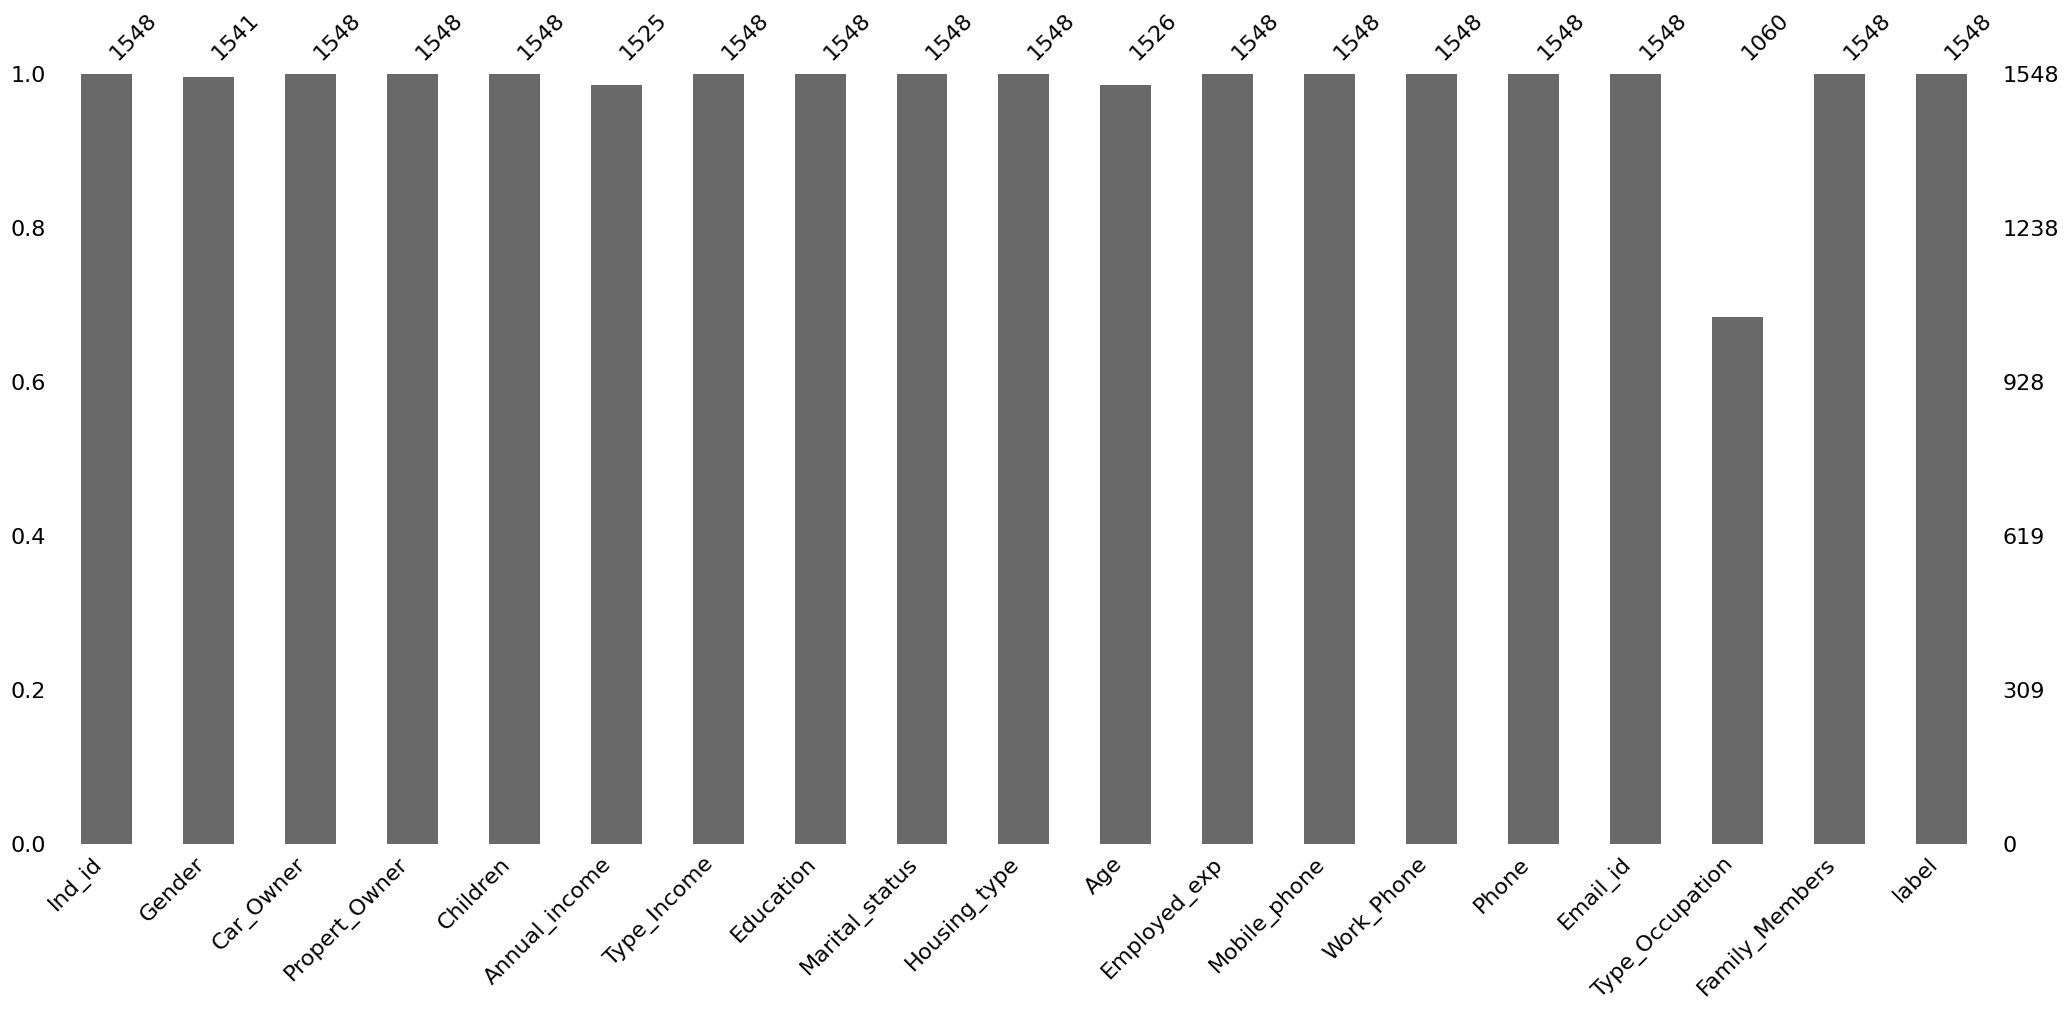

In [ ]:
# exploratory the missing values
import missingno as msno
msno.bar(df2)

<Axes: >

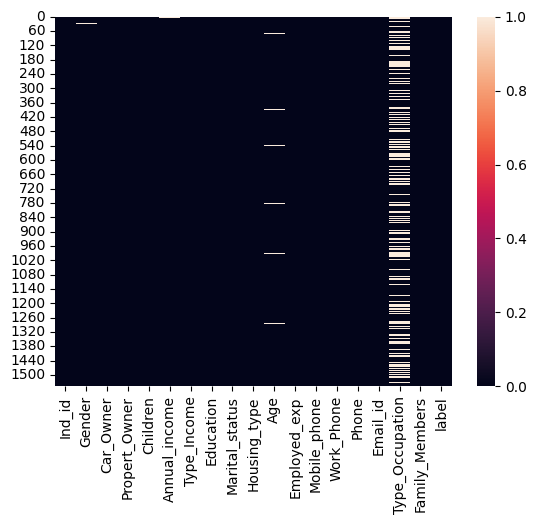

In [ ]:
# visualising the missing values
sns.heatmap(df2.isnull())

In [ ]:
# Imputing the null values with mean values
df2.fillna(df2.mean(), inplace=True)

In [ ]:
# finding the null values.
df2.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# replace missing values
df2['Type_Occupation'].fillna('other',inplace=True)

In [ ]:
df2["Gender"].mode()

0    F
Name: Gender, dtype: object

In [ ]:
df2.fillna(df2["Gender"].mode())

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2,0


In [ ]:
df2.shape

(1548, 19)

In [ ]:
df2.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employed_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1548 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [ ]:
# converting the negative values to actual age
df2['Age']=abs(round((df2['Age']/-365),0))
# converting negative values to exprience of the employee
df2['Employed_exp']=abs(round((df2['Employed_exp']/-365),0))

In [ ]:
# replacing the extreme values with zero.
df2['Employed_exp'].replace(1001.0, 0,inplace=True)

In [ ]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


# **Data Analysis Approach EDA**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Distribution of 'Annual_income' using a histogram
fig = px.histogram(df2, x='Annual_income', nbins=20, title='Distribution of Annual Income')
fig.show()

In [ ]:
# Box plot of 'Age' grouped by 'Gender'
fig = px.box(df2, x='Gender', y='Age', points='all', title='Age Distribution by Gender')
fig.show()

In [ ]:
# Pie chart of 'Type_Income'
fig = px.pie(df2, names='Type_Income', title='Distribution of Income Types')
fig.show()

In [ ]:
# Correlation heatmap
corr_matrix = df2.corr()
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.index, colorscale='Viridis'))
fig.update_layout(title='Correlation Heatmap')
fig.show()

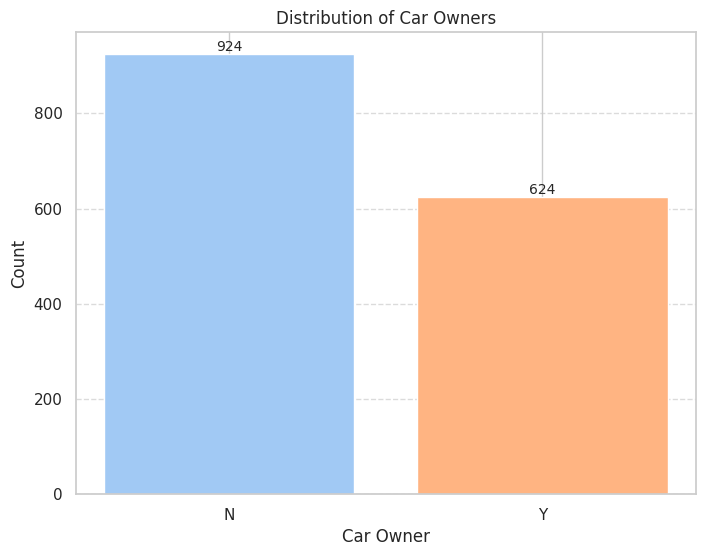

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

car_owner_count = df2['Car_Owner'].value_counts()

# Using Seaborn for a more attractive color palette
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Custom colors
colors = sns.color_palette("pastel")[0:len(car_owner_count)]

# Bar plot
plt.bar(car_owner_count.index, car_owner_count.values, color=colors)

# Adding labels and title
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.title('Distribution of Car Owners')

# Adding value annotations on top of each bar
for i, count in enumerate(car_owner_count.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

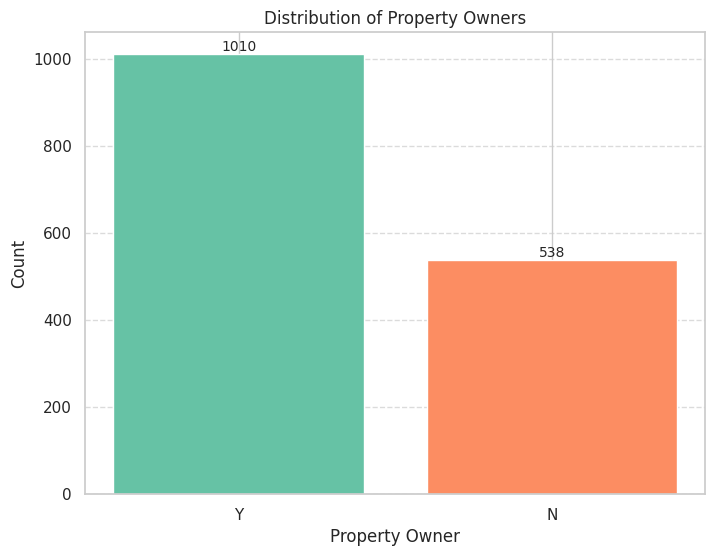

In [ ]:

propert_owner_count = df2['Propert_Owner'].value_counts()

# Using Seaborn for a more attractive color palette
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Custom colors
colors = sns.color_palette("Set2")[0:len(propert_owner_count)]

# Bar plot
plt.bar(propert_owner_count.index, propert_owner_count.values, color=colors)

# Adding labels and title
plt.xlabel('Property Owner')
plt.ylabel('Count')
plt.title('Distribution of Property Owners')

# Adding value annotations on top of each bar
for i, count in enumerate(propert_owner_count.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:


children_count = df2['Children'].value_counts().reset_index().rename(columns={'index': 'Number of Children', 'Children': 'Count'})

# Bar plot using Plotly Express
fig = px.bar(children_count, x='Number of Children', y='Count', color='Number of Children',
             labels={'Number of Children': 'Number of Children'},
             title='Distribution of Number of Children')

# Adding labels and title
fig.update_layout(xaxis_title='Number of Children', yaxis_title='Count', showlegend=False)

# Show plot
fig.show()

In [ ]:

Type_Income_count = df2['Type_Income'].value_counts().reset_index().rename(columns={'index': 'Type_Income', 'Type_Income': 'Count'})

# Bar plot using Plotly Express
fig = px.bar(Type_Income_count, x='Type_Income', y='Count', color='Type_Income',
             labels={'Type_Income': 'Income Type'},
             title='Distribution of Income Types')

# Adding labels and title
fig.update_layout(xaxis_title='Income Type', yaxis_title='Count', showlegend=False)

# Show plot
fig.show()

In [ ]:

Education_count = df2['Education'].value_counts().reset_index().rename(columns={'index': 'Education', 'Education': 'Count'})

# Bar plot using Plotly Express
fig = px.bar(Education_count, x='Education', y='Count', color='Education',
             labels={'Education': 'Education Level'},
             title='Distribution of Education Levels')

# Adding labels and title
fig.update_layout(xaxis_title='Education Level', yaxis_title='Count', showlegend=False)

# Show plot
fig.show()


In [ ]:

Marital_status_count = df2['Marital_status'].value_counts().reset_index().rename(columns={'index': 'Marital_status', 'Marital_status': 'Count'})

# Bar plot using Plotly Express
fig = px.bar(Marital_status_count, x='Marital_status', y='Count', color='Marital_status',
             labels={'Marital_status': 'Marital Status'},
             title='Distribution of Marital Status')

# Adding labels and title
fig.update_layout(xaxis_title='Marital Status', yaxis_title='Count', showlegend=False)

# Show plot
fig.show()

In [ ]:
Housing_type_count = df2['Housing_type'].value_counts().reset_index().rename(columns={'index': 'Housing_type', 'Housing_type': 'Count'})

# Bar plot using Plotly Express
fig = px.bar(Housing_type_count, x='Housing_type', y='Count', color='Housing_type',
             labels={'Housing_type': 'Housing Type'},
             title='Distribution of Housing Types')

# Adding labels and title
fig.update_layout(xaxis_title='Housing Type', yaxis_title='Count', showlegend=False)

# Show plot
fig.show()

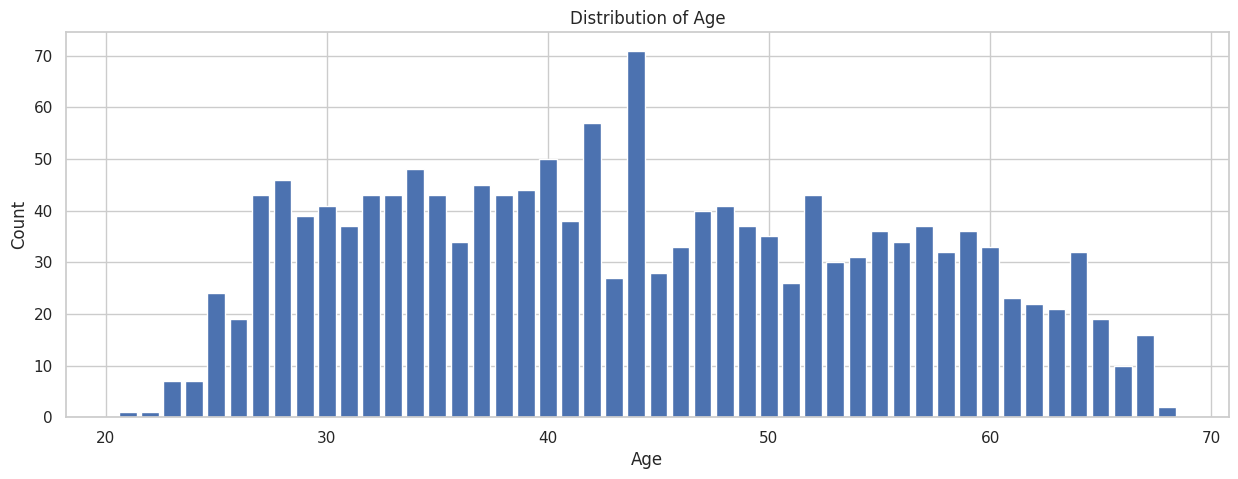

In [ ]:
# Count number of Age
Age_count = df2['Age'].value_counts().reset_index().rename(columns={'index': 'Age', 'Age': 'Count'})

# Create bar plot using Matplotlib
plt.figure(figsize=(15, 5))
plt.bar(Age_count['Age'], Age_count['Count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

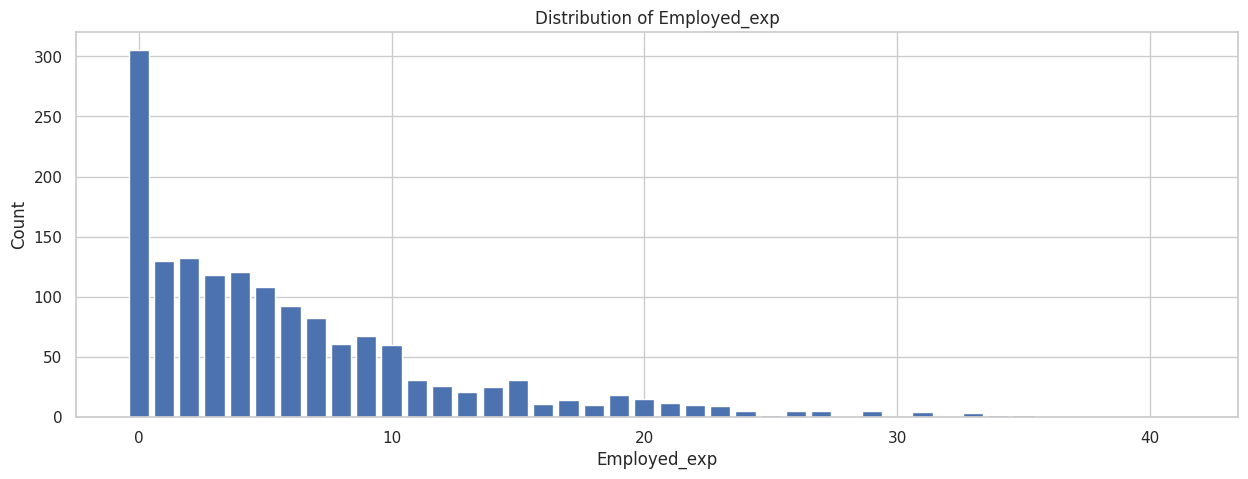

In [ ]:
Employed_days_count = df2['Employed_exp'].value_counts().reset_index().rename(columns={'index': 'Employed_exp', 'Employed_exp': 'Count'})

# Create bar plot using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Employed_days_count['Employed_exp'], Employed_days_count['Count'])
plt.xlabel('Employed_exp')
plt.ylabel('Count')
plt.title('Distribution of Employed_exp')
plt.show()

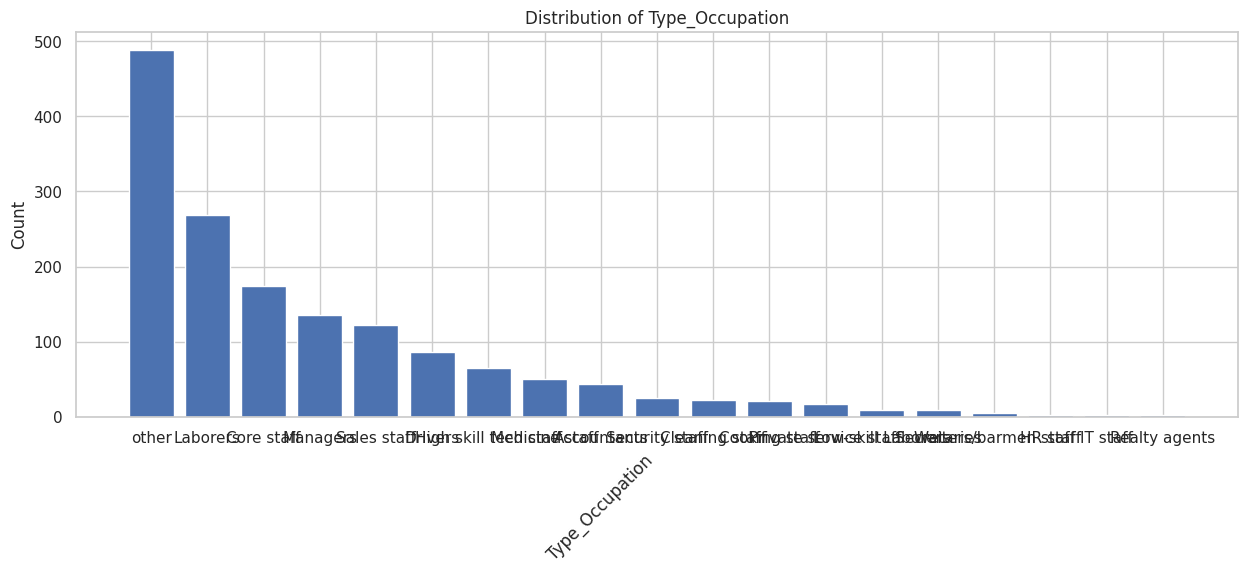

In [ ]:
Type_Occupation_count = df2['Type_Occupation'].value_counts().reset_index().rename(columns={'index': 'Type_Occupation', 'Type_Occupation': 'Count'})

# Create bar plot using Matplotlib with rotated x-axis labels
plt.figure(figsize=(15, 5))
plt.bar(Type_Occupation_count['Type_Occupation'], Type_Occupation_count['Count'])
plt.xlabel('Type_Occupation', rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Distribution of Type_Occupation')
plt.show()

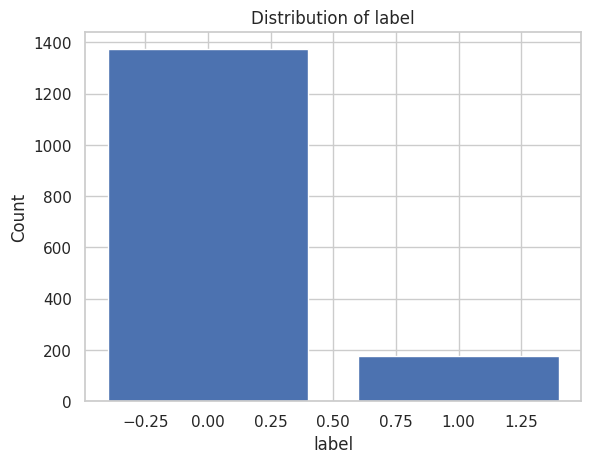

In [ ]:
label_count = df2['label'].value_counts()

# Create bar plot using Matplotlib
plt.bar(label_count.index, label_count.values)
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Distribution of label')
plt.show()

In [ ]:
# download the clean file For SQL Advanced Data Anlaysis
df2.to_csv("Cleaned_Card_Approvalfinal_project.csv")

In [ ]:
df2.head(5)

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


# Relation between categorical variables

In [ ]:
# Find out the correlation between variables using spearman rank correlation
df = df2.corr(method='spearman')
df

,Ind_id,Children,Annual_income,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Family_Members,label
Ind_id,1.000000,0.028212,-0.013105,-0.021342,0.022135,NaN,0.085486,0.005962,-0.040371,0.009687,0.016414
Children,0.028212,1.000000,0.064618,-0.336025,0.156268,NaN,0.039430,0.016628,0.058465,0.814579,-0.016235
Annual_income,-0.013105,0.064618,1.000000,-0.109380,0.165718,NaN,-0.069762,-0.015766,0.118244,0.039162,0.010013
Age,-0.021342,-0.336025,-0.109380,1.000000,-0.196028,NaN,-0.163870,0.032580,-0.163893,-0.275588,0.045250
Employed_exp,0.022135,0.156268,0.165718,-0.196028,1.000000,NaN,0.157747,0.008579,-0.005983,0.181474,-0.102582
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085486,0.039430,-0.069762,-0.163870,0.157747,NaN,1.000000,0.352439,-0.009594,0.086419,-0.007046
Phone,0.005962,0.016628,-0.015766,0.032580,0.008579,NaN,0.352439,1.000000,0.018105,0.021121,-0.000664
Email_id,-0.040371,0.058465,0.118244,-0.163893,-0.005983,NaN,-0.009594,0.018105,1.000000,0.056622,0.012921
Family_Members,0.009687,0.814579,0.039162,-0.275588,0.181474,NaN,0.086419,0.021121,0.056622,1.000000,-0.026446


<Axes: >

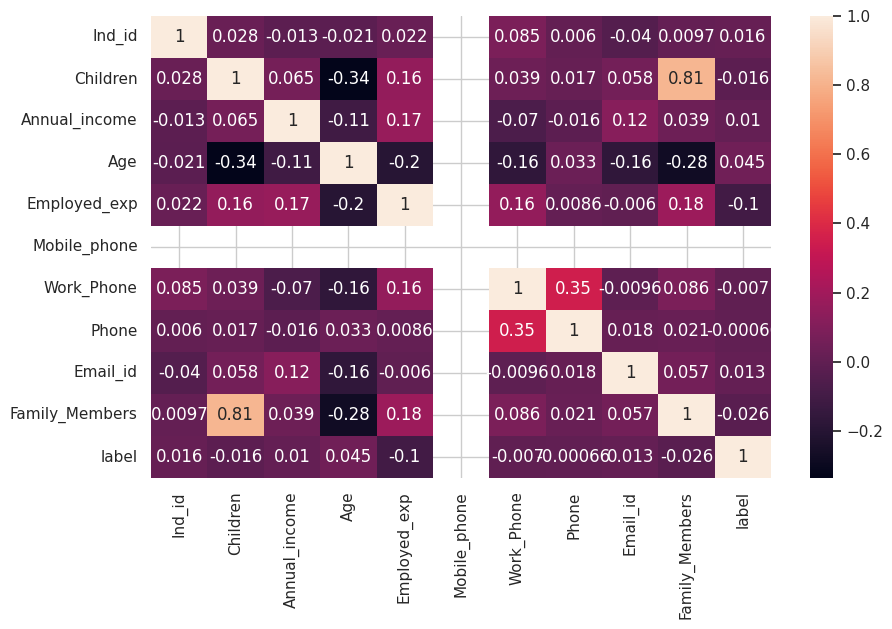

In [ ]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df,annot=True)

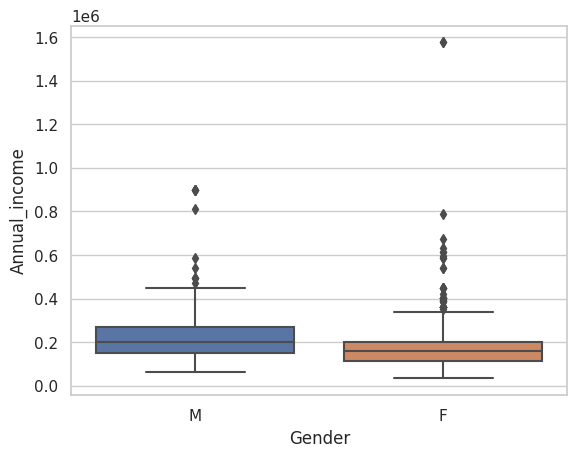

In [ ]:
sns.boxplot(x ='Gender',y ="Annual_income",data=df2)
plt.show()

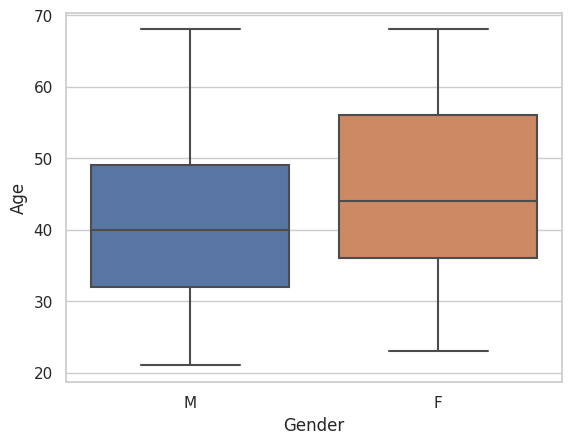

In [ ]:
sns.boxplot(x ='Gender',y ="Age",data=df2)
plt.show()

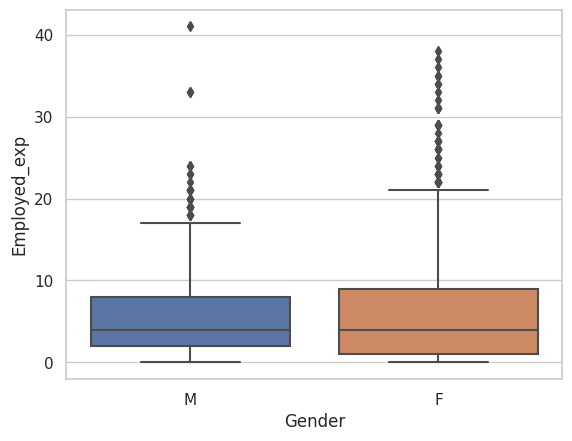

In [ ]:
sns.boxplot(x ='Gender',y ="Employed_exp",data=df2)
plt.show()

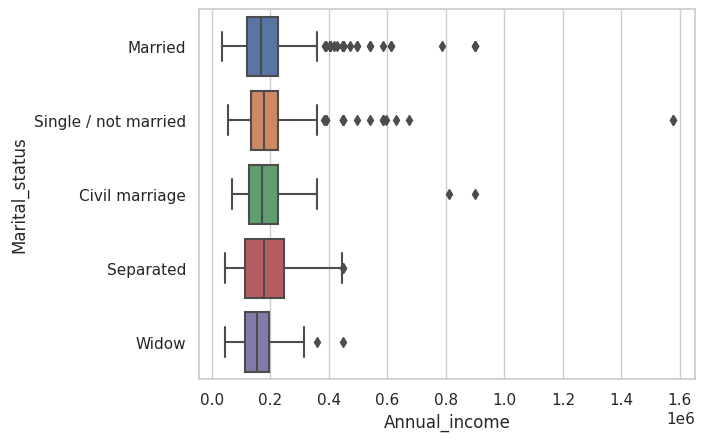

In [ ]:
sns.boxplot(x ='Annual_income',y ="Marital_status",data=df2)
plt.show()

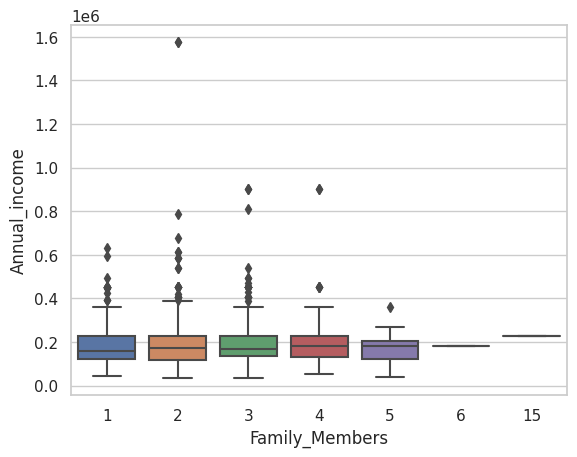

In [ ]:
sns.boxplot(x ='Family_Members',y ="Annual_income",data=df2)
plt.show()

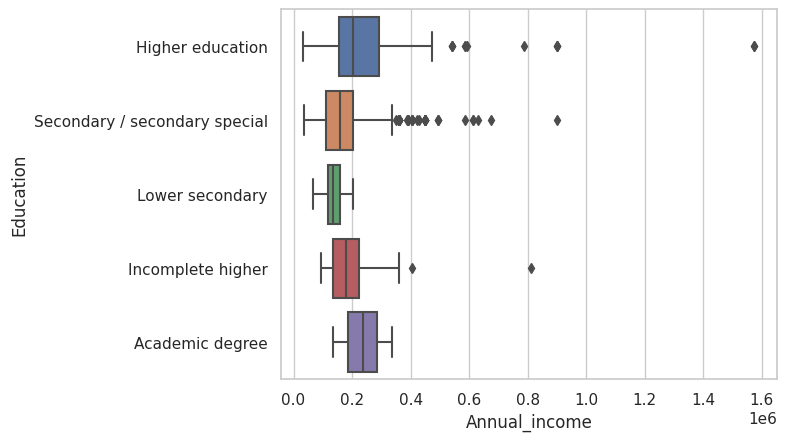

In [ ]:
sns.boxplot(x ='Annual_income',y ="Education",data=df2)
plt.show()

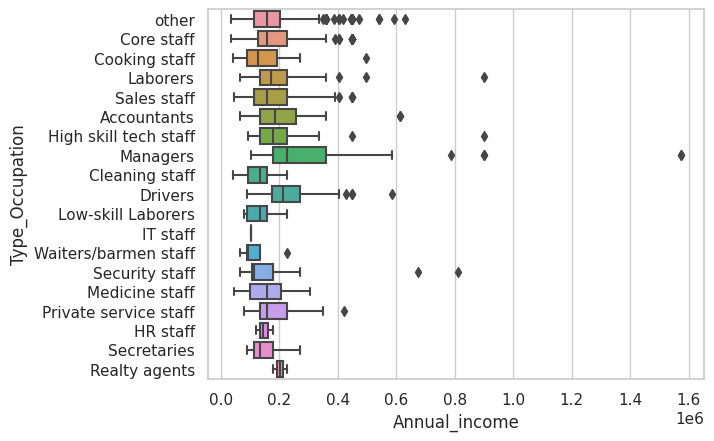

In [ ]:
sns.boxplot(x ='Annual_income',y ="Type_Occupation",data=df2)
plt.show()

In [ ]:
df2.head()

,Ind_id,Gender,Car_Owner,Propert_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_exp,Mobile_phone,Work_Phone,Phone,Email_id,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [ ]:
# removing unused columns
df2 = df2.drop(['Ind_id', 'Mobile_phone','Work_Phone','Phone','Email_id'], axis=1)

#Feature Engineering

In [ ]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df2:
  if df2[col].dtype=='object':
    df2[col]=le.fit_transform(df2[col])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1548 non-null   int64  
 1   Car_Owner        1548 non-null   int64  
 2   Propert_Owner    1548 non-null   int64  
 3   Children         1548 non-null   int64  
 4   Annual_income    1548 non-null   float64
 5   Type_Income      1548 non-null   int64  
 6   Education        1548 non-null   int64  
 7   Marital_status   1548 non-null   int64  
 8   Housing_type     1548 non-null   int64  
 9   Age              1548 non-null   float64
 10  Employed_exp     1548 non-null   float64
 11  Type_Occupation  1548 non-null   int64  
 12  Family_Members   1548 non-null   int64  
 13  label            1548 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 181.4 KB


In [ ]:
df2.shape

(1548, 14)

#Model Building

In [ ]:
# feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = df2.iloc[:,0:-1]
y = df2.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
# count the number rows and columns for x_test
x_test.shape

(465, 13)

In [ ]:
# count the number rows and columns for x_train
x_train.shape

(1083, 13)

In [ ]:
# count the number rows for y_test
y_test.shape

(465,)

In [ ]:
# count the number rows for y_train
y_train.shape

(1083,)

# Scaling

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(1083, 13)
(465, 13)


**Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable.**

# LogisticRegression

In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(x_train, y_train))
print("logistic regression testing set:",logreg.score(x_test, y_test))
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

logistic regression training set: 0.8873499538319483
logistic regression testing set: 0.886021505376344
Accuracy of logistic regression classifier:  0.886021505376344
[[412   0]
 [ 53   0]]


#cross validation
**The cross-validation is done using the ShuffleSplit method**

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.94516129 0.8516129  0.9        0.88709677 0.88387097 0.88387097
 0.87419355 0.87741935 0.88709677 0.90322581]
0.8893548387096774


# Decision Tree

In [ ]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train))
print("decision tree testing set:",classification.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

decision tree training set: 0.9926131117266851
decision tree testing set: 0.8451612903225807
Accuracy: 0.8451612903225807
[[371  41]
 [ 31  22]]


# cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.87096774 0.83548387 0.86451613 0.87096774 0.87096774 0.84193548
 0.87419355 0.8483871  0.88064516 0.8516129 ]
0.8609677419354839


# XG boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("xg training set:",xg.score(x_train, y_train))
print("xg testing set:",xg.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

xg training set: 0.9916897506925207
xg testing set: 0.9139784946236559
Accuracy: 0.9139784946236559
[[402  10]
 [ 30  23]]


# cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.91935484 0.92903226 0.91290323 0.90322581 0.90322581 0.89354839
 0.93548387 0.9483871  0.92903226 0.90322581]
0.917741935483871


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train))
print("rf testing set:",rf.score(x_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 0.9926131117266851
rf testing set: 0.9204301075268817
Random Forest classifier has accuracy of:  0.9204301075268817
[[410   2]
 [ 35  18]]


# cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.92903226 0.92903226 0.91935484 0.93548387 0.89032258 0.92258065
 0.90322581 0.9483871  0.9483871  0.90645161]
0.9232258064516129


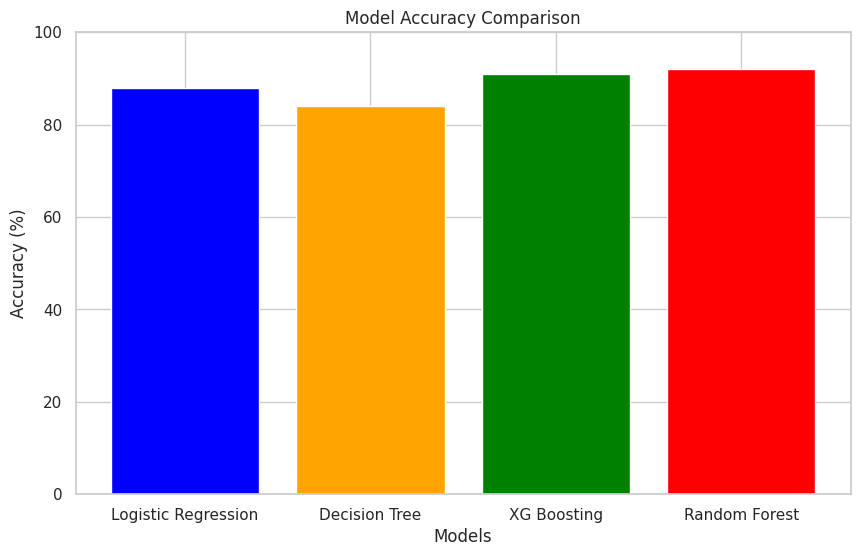

In [ ]:
# Graphical Representation of Models Accuracy:

import matplotlib.pyplot as plt

# Assuming you have accuracies for each model
models = ['Logistic Regression', 'Decision Tree', 'XG Boosting', 'Random Forest']
accuracies = [88, 84, 91, 92]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 100)  # Set y-axis limits to ensure a proper scale
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()

#conclusion
Hence we got accuracy on different classification

-logisitic regression got accuracy 88%

-DecisionTree got accuracy 84%

-xg boosting got accuracy 91%

-Random Forest got accuracy 92%

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection we used four machine learning models and achieved quite good accuracy 92% in Random Forest for predicting the credit card approval.

#Questions to Answer



**Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**

 The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction

**How is it going to impact the banking sector?**

predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability.

Improved customer experience: By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

Reduced risk of credit defaults: Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

Improved profitability: By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue

**If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

 If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions, enhancing credit risk management strategies, and improving efficiency. However, to fully leverage the benefits of our proposed method, banks will need to ensure that they have access to reliable and comprehensive data sources.

# SQL Advanced Analysis

1)Group the customers based on their income type and find the average of their annual income.

In [ ]:
import pandas as pd

# Assuming your uploaded file is named 'cleaned_data.csv'
df_cleaned = pd.read_csv('/content/Cleaned_Card_Approvalfinal_project.csv')

import duckdb

conn = duckdb.connect()
conn.register('Credit_Card', df_cleaned)


result = conn.execute("SELECT Type_Income, AVG(Annual_income) AS Avg_Annual_Income FROM Credit_Card GROUP BY Type_Income").fetchdf()

# Display the result
result

,Type_Income,Avg_Annual_Income
0,Pensioner,155713.746487
1,Working,181191.434321
2,State servant,211422.413793
3,Commercial associate,233653.135917


2) Find the female owners of cars and property.

In [ ]:
query_1 = """
SELECT Gender, COUNT(*) AS Count
FROM Credit_Card
WHERE Gender = 'F' AND (Car_Owner = 'Y' OR Propert_Owner = 'Y')
GROUP BY Gender;
"""

result_1 = conn.execute(query_1).fetchdf()
result_1

,Gender,Count
0,F,729


3) Find the male customers who are staying with their families.

In [ ]:
# Query to find male customers staying with their families
query_male_staying_with_family = """
SELECT Gender, COUNT(*) AS Count
FROM Credit_Card
WHERE Gender = 'M' AND Marital_status = 'Married' AND Family_Members > 1
GROUP BY Gender;
"""

# Execute the query and fetch the result
result_male_staying_with_family = conn.execute(query_male_staying_with_family).fetchdf()
result_male_staying_with_family

,Gender,Count
0,M,418


4) Please list the top five people having the highest income

In [ ]:
# Query to list the top five people with the highest income
query_top_five_highest_income = """
SELECT Ind_ID, Annual_income
FROM Credit_Card
ORDER BY Annual_income DESC
LIMIT 5;
"""

# Execute the query and fetch the result
result_top_five_highest_income = conn.execute(query_top_five_highest_income).fetchdf()
result_top_five_highest_income

,Ind_id,Annual_income
0,5143231,1575000.0
1,5143235,1575000.0
2,5090470,900000.0
3,5079016,900000.0
4,5079017,900000.0


5) How many married people are having bad credit?

In [ ]:
# Query to count the number of married people with bad credit
query_married_bad_credit = """
SELECT COUNT(*) AS Count
FROM Credit_Card
WHERE Marital_status = 'Married' AND label = 1;
"""

# Execute the query and fetch the result
result_married_bad_credit = conn.execute(query_married_bad_credit).fetchdf()
result_married_bad_credit

,Count
0,114


6) What is the highest education level and what is the total count?

In [ ]:
# Query to find the highest education level and its total count
query_highest_education_level = """
SELECT Education, COUNT(*) AS Count
FROM Credit_Card
GROUP BY Education
ORDER BY Count DESC
LIMIT 1;
"""

# Execute the query and fetch the result
result_highest_education_level = conn.execute(query_highest_education_level).fetchdf()
result_highest_education_level


,Education,Count
0,Secondary / secondary special,1031


7) Between married males and females, who is having more bad credit?

In [ ]:
# Query to compare bad credit between married males and females
query_bad_credit_by_gender = """
SELECT Gender, COUNT(*) AS Count
FROM Credit_Card
WHERE Marital_status = 'Married' AND label = 1
GROUP BY Gender;
"""

# Execute the query and fetch the result
result_bad_credit_by_gender = conn.execute(query_bad_credit_by_gender).fetchdf()
result_bad_credit_by_gender


,Gender,Count
0,None,4
1,M,51
2,F,59
